# Bank Marketing Data Analysis

## Data exploration

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [5]:
df = pd.read_csv('../data/bank-full.csv', sep=';')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


There are 17 columns. 10 are categorical and 7 are numeric. 'y' is the target variable.

In [7]:
df.sample(10).transpose()

,18323,24804,13894,4391,15900,42014,21162,7305,205,36404
age,52,34,60,33,33,36,37,41,50,52
job,blue-collar,blue-collar,management,admin.,services,student,technician,blue-collar,services,services
marital,single,married,married,single,married,single,married,married,married,divorced
education,secondary,secondary,tertiary,secondary,secondary,tertiary,secondary,primary,secondary,secondary
default,no,no,no,no,no,no,no,no,no,no
balance,-477,559,340,434,0,129,588,943,5699,0
housing,no,yes,no,yes,yes,no,yes,yes,yes,yes
loan,no,no,yes,no,no,no,no,no,no,no
contact,cellular,telephone,cellular,unknown,telephone,cellular,cellular,unknown,unknown,cellular
day,31,18,10,20,22,27,14,29,5,11


Are there any missing values?

In [174]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

How many unique values does each column contain?

In [188]:
for col in df.columns:
    print('{:10} : {:5} {:}'.format(col, df[col].nunique(), df[col].dtype))

age        :    77 int64
job        :    12 object
marital    :     3 object
education  :     4 object
default    :     2 object
balance    :  7168 int64
housing    :     2 object
loan       :     2 object
contact    :     3 object
day        :    31 int64
month      :    12 object
duration   :  1573 int64
campaign   :    48 int64
pdays      :   559 int64
previous   :    41 int64
poutcome   :     4 object
y          :     2 object


### Information about the categorical features:

In [155]:
for col in df.columns:
    if df[col].nunique() < 20:
        print('=======================================')
        print(col)
        print('---------------------------------------')
        print(round(1e2*df[col].value_counts()/len(df),2))

job
---------------------------------------
blue-collar      21.53
management       20.92
technician       16.80
admin.           11.44
services          9.19
retired           5.01
self-employed     3.49
entrepreneur      3.29
unemployed        2.88
housemaid         2.74
student           2.07
unknown           0.64
Name: job, dtype: float64
marital
---------------------------------------
married     60.19
single      28.29
divorced    11.52
Name: marital, dtype: float64
education
---------------------------------------
secondary    51.32
tertiary     29.42
primary      15.15
unknown       4.11
Name: education, dtype: float64
default
---------------------------------------
no     98.2
yes     1.8
Name: default, dtype: float64
housing
---------------------------------------
yes    55.58
no     44.42
Name: housing, dtype: float64
loan
---------------------------------------
no     83.98
yes    16.02
Name: loan, dtype: float64
contact
---------------------------------------
cellular    

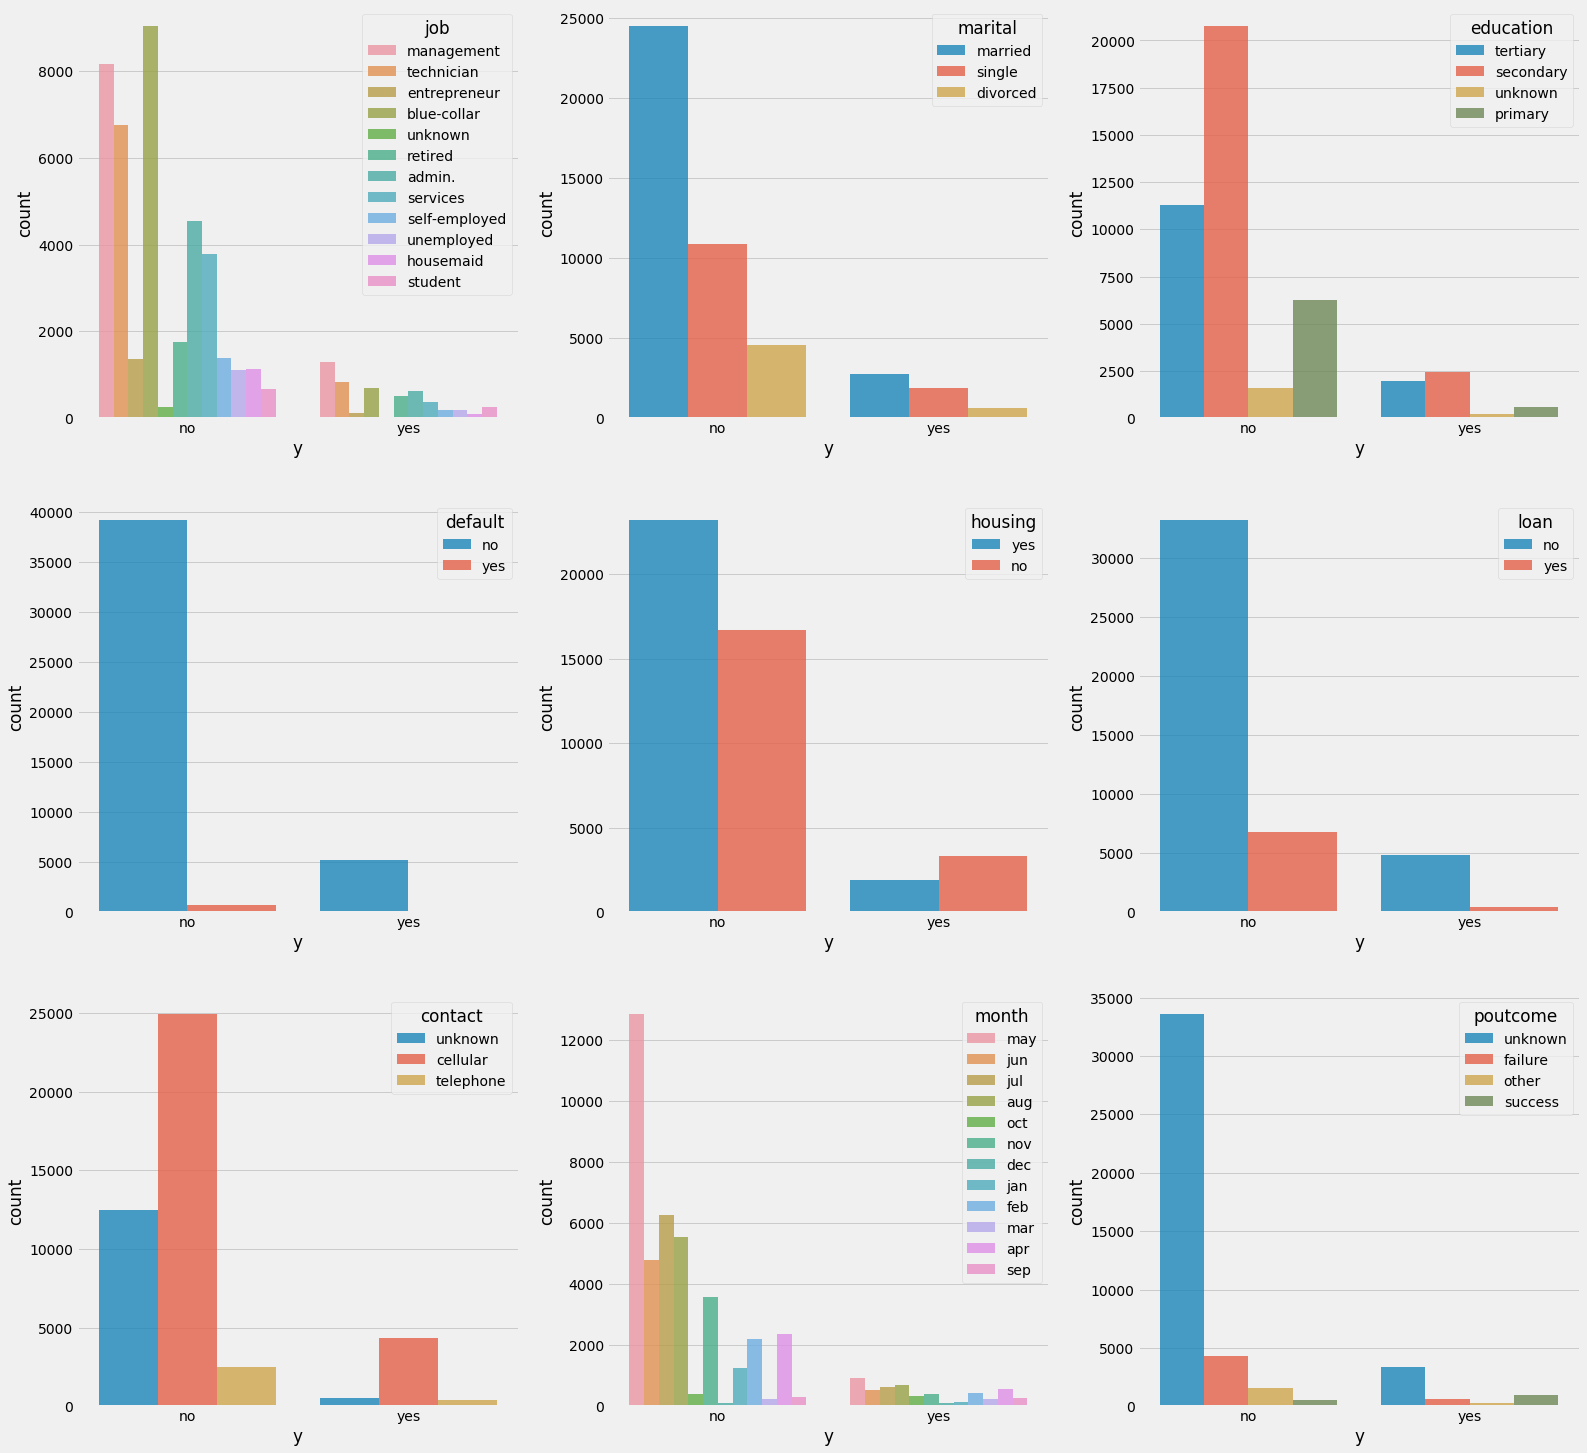

In [191]:
categorical_columns = df.drop('y', axis=1).select_dtypes(include=['object']).columns
new_cat_list = []
for idx in range(4):
    new_cat_list.append(categorical_columns[3*idx: 3*idx+3])

fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(24,24))
for i in range(3):
    for j in range(3):
        sns.countplot(x='y', hue=new_cat_list[i][j], data=df, ax=axs[i,j], alpha=.8)
plt.show()

### Information about the numeric features:

In [173]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


[]

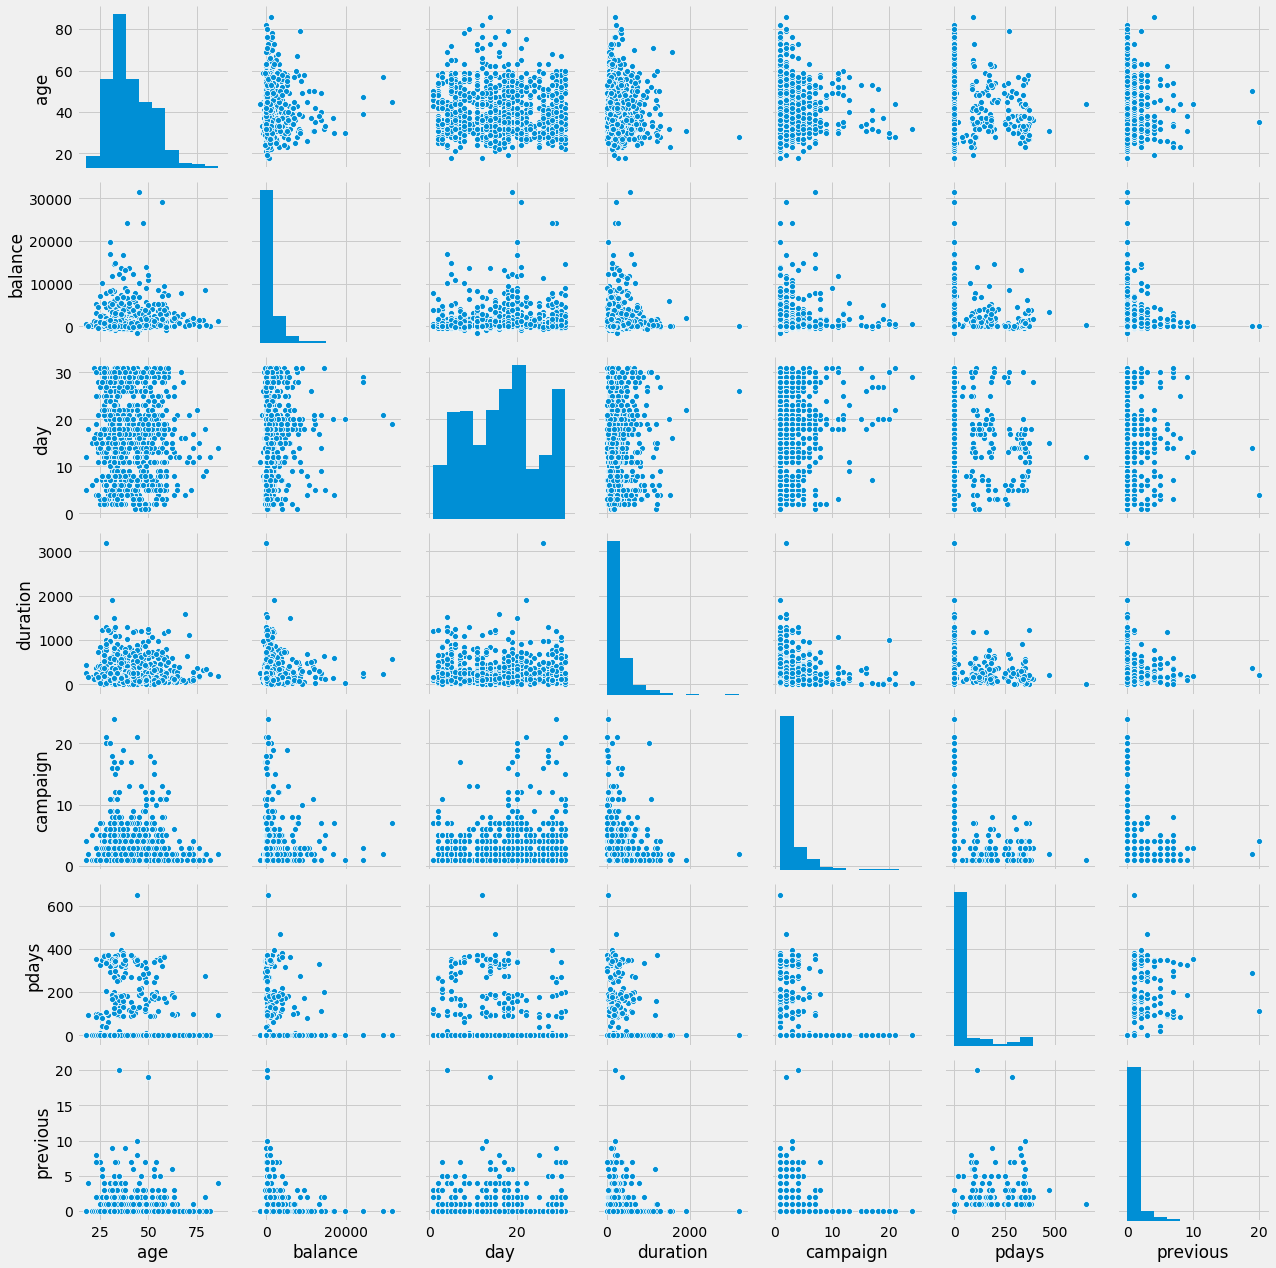

In [172]:
sns.pairplot(df.sample(10**3))
plt.plot()